Tarea 11.1
1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search.
2. Con los mejores párametros dibujar  las fronteras de clasificación
3. Con los mejores parámetros dibujar la matriz de confusion

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

En primera instancia podemos ver la distribucion de los dataSets, de la siguiente forma:

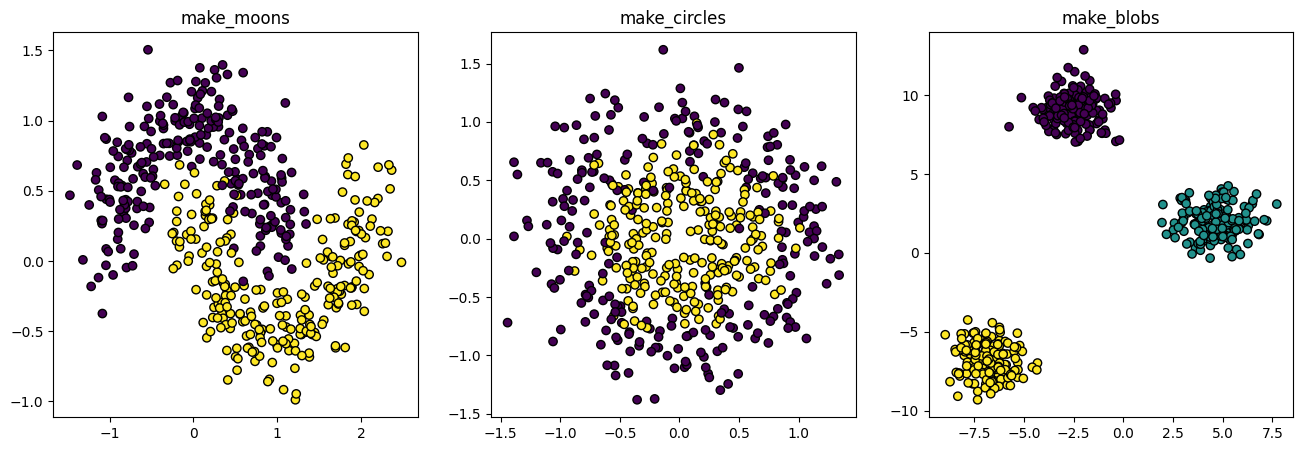

In [96]:
datasets = {
    'make_moons': make_moons(n_samples=500, noise=0.2, random_state=42),
    'make_circles': make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42),
    'make_blobs': make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
}

def plot_dataCleanSet():
  plt.figure(figsize=(16, 5))
  for i, (name, (X, y)) in enumerate(datasets.items()):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(name)
  plt.show()

plot_dataCleanSet()

Creemos ahora una clase con la cual entrenaremos un modelo  mediante el GridSearch

In [97]:
class SVMClassifier:
    def __init__(self, data_set_name, data):
        self.data_set_name = data_set_name
        self.X, self.Y = data
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size=0.3, random_state=42)

    def train_evaluate(self):
        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100, 1000],
            'gamma': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
        grid_search.fit(self.X_train, self.Y_train)
        print(f"Mejores parámetros para {self.data_set_name}: {grid_search.best_params_}")
        self.best_model = grid_search.best_estimator_

    def plot_decision_boundaries(self, ax):
        x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = self.best_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        ax.scatter(self.X[:, 0], self.X[:, 1], c=self.Y, edgecolors='k', cmap=plt.cm.coolwarm)
        ax.set_title(f"{self.data_set_name}")

    def plot_confusion_matrix(self, ax):
        y_pred = self.best_model.predict(self.X_test)
        cm = confusion_matrix(self.Y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.best_model.classes_)
        disp.plot(ax=ax)
        ax.set_title(f"{self.data_set_name}")
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')

In [98]:
classifiers = []
for data_set_name, data in datasets.items():
    classifier = SVMClassifier(data_set_name, data)
    classifier.train_evaluate()
    classifiers.append(classifier)

Mejores parámetros para make_moons: {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
Mejores parámetros para make_circles: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mejores parámetros para make_blobs: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}


Luego de tener los mejores parametros para podemos proceder a dibujar las fronteras de decision para cada uno de los casos:

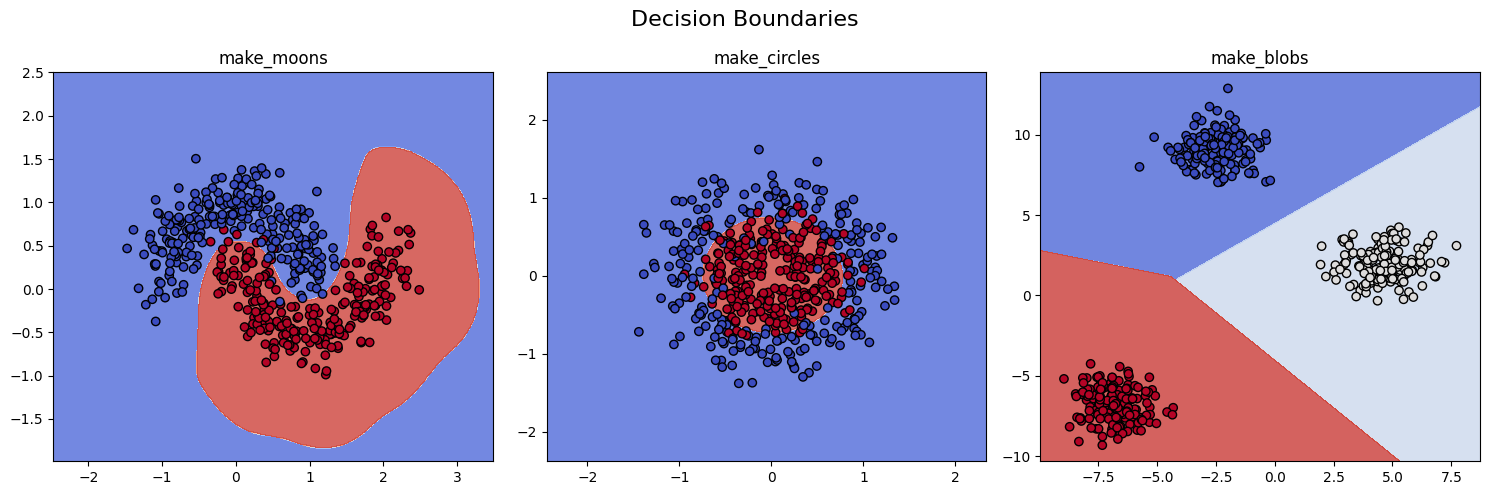

In [99]:
fig_decision_boundaries, axes_db = plt.subplots(1, len(classifiers), figsize=(15, 5))
fig_decision_boundaries.suptitle("Decision Boundaries", fontsize=16)

for i, classifier in enumerate(classifiers):
    classifier.plot_decision_boundaries(axes_db[i])
    axes_db[i].set_title(f"{classifier.data_set_name}")

plt.tight_layout()
plt.show()

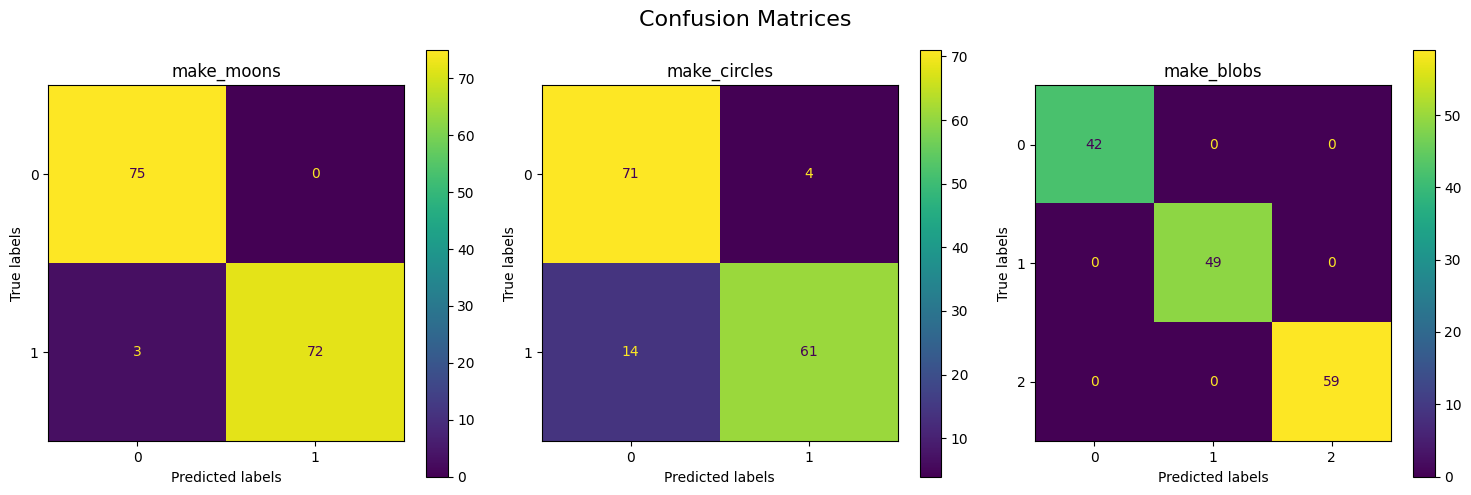

In [100]:
fig_confusion_matrix, axes_cm = plt.subplots(1, len(classifiers), figsize=(15, 5))
fig_confusion_matrix.suptitle("Confusion Matrices", fontsize=16)

for i, classifier in enumerate(classifiers):
    classifier.plot_confusion_matrix(axes_cm[i])

plt.tight_layout()
plt.show()

Notemos que en el caso de make_circles hay algunos datos que no se estan prediciendo correctamente, probablemente, por la distribucion que tienen los datos, puesto que en datos mucho mas separados entre si, como es el caso de make_blobs podemos ver en la matriz de confusion como esta frontera de decision se difuja correctamente, al igual que en el caso de make moons, donde los datos perdidos son muy pocos